In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.layouts import row, column

from bokeh.models import BoxSelectTool, LassoSelectTool, Spacer

from bokeh.plotting import figure, curdoc

%matplotlib inline


In [4]:
gdp_df = pd.read_csv('~/nss_data_science/data-question-1-unewsome/data/gdp_percapita.csv', nrows=6206)
gdp_df.head(6)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2016,1802.695566,NaN
1,Afghanistan,2015,1809.016488,NaN
2,Afghanistan,2014,1838.960244,NaN
3,Afghanistan,2013,1848.700026,NaN
4,Afghanistan,2012,1839.273579,NaN
5,Afghanistan,2011,1660.739856,NaN


In [5]:
internet_df = pd.read_csv('~/nss_data_science/data-question-1-unewsome/data/internet_use.csv', nrows=4495)
internet_df.head(6)


,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2014,6.390000,NaN
1,Afghanistan,2013,5.900000,NaN
2,Afghanistan,2012,5.454545,NaN
3,Afghanistan,2011,5.000000,NaN
4,Afghanistan,2010,4.000000,NaN
5,Afghanistan,2009,3.550000,NaN


In [6]:
internet_df.shape

(4495, 4)

In [7]:
gdp_df.shape

(6206, 4)

In [8]:
gdp_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [9]:
internet_df.dtypes

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object

In [10]:
del gdp_df['Value Footnotes']
gdp_df.tail(10)

,Country or Area,Year,Value
6196,Zimbabwe,1999,2699.857521
6197,Zimbabwe,1998,2761.318537
6198,Zimbabwe,1997,2725.888701
6199,Zimbabwe,1996,2698.917300
6200,Zimbabwe,1995,2488.298028
6201,Zimbabwe,1994,2529.826671
6202,Zimbabwe,1993,2360.793284
6203,Zimbabwe,1992,2384.972026
6204,Zimbabwe,1991,2681.495089
6205,Zimbabwe,1990,2605.794944


In [11]:
del internet_df['Value Footnotes']
internet_df.tail(10)

,Country or Area,Year,Value
4485,Zimbabwe,2002,3.994356
4486,Zimbabwe,2001,0.799846
4487,Zimbabwe,2000,0.401434
4488,Zimbabwe,1999,0.161676
4489,Zimbabwe,1998,0.081648
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739
4494,Zimbabwe,1990,0.000000


In [12]:
gdp_df.columns

Index(['Country or Area', 'Year', 'Value'], dtype='object')

In [13]:
gdp_df.columns=['Country','Year','GDP_Per_Capita']
internet_df.columns=['Country','Year','Internet_Users_Pct']


In [14]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


In [15]:
gdp_and_internet_use=pd.merge(gdp_df, internet_df, on = ['Country', 'Year'], how = 'outer')
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
0,Afghanistan,2016,1802.695566,NaN
1,Afghanistan,2015,1809.016488,NaN
2,Afghanistan,2014,1838.960244,6.390000
3,Afghanistan,2013,1848.700026,5.900000
4,Afghanistan,2012,1839.273579,5.454545


In [16]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7172,Virgin Islands (U.S.),1997,NaN,6.948369
7173,Virgin Islands (U.S.),1996,NaN,4.647186
7174,Virgin Islands (U.S.),1995,NaN,2.801958
7175,Virgin Islands (U.S.),1994,NaN,0.940645
7176,Virgin Islands (U.S.),1990,NaN,0.000000


In [17]:
years = [2004, 2009, 2014]
gdp_and_internet_use_years = gdp_and_internet_use[gdp_and_internet_use.Year.isin(years)]
gdp_and_internet_use_years.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2,Afghanistan,2014,1838.960244,6.390000
7,Afghanistan,2009,1531.173993,3.550000
12,Afghanistan,2004,1062.249360,0.105809
17,Albania,2014,10701.120786,60.100000
22,Albania,2009,9524.649303,41.200000


In [18]:
year_2004 = [2004]
gdp_and_internet_use_2004 = gdp_and_internet_use_years[gdp_and_internet_use_years.Year == 2004]
gdp_and_internet_use_2004.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
12,Afghanistan,2004,1062.249360,0.105809
27,Albania,2004,7277.214908,2.420388
54,Algeria,2004,11797.184849,4.634475
81,Angola,2004,3461.018084,0.464815
108,Antigua and Barbuda,2004,19282.229791,24.266544


In [19]:
year_2009 = [2009]
gdp_and_internet_use_2009 = gdp_and_internet_use_years[gdp_and_internet_use_years.Year == 2009]
gdp_and_internet_use_2009.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
7,Afghanistan,2009,1531.173993,3.55
22,Albania,2009,9524.649303,41.20
49,Algeria,2009,12647.540304,11.23
76,Angola,2009,5908.051427,6.00
103,Antigua and Barbuda,2009,20942.301180,42.00


In [20]:
year_2014 = [2014]
gdp_and_internet_use_2014 = gdp_and_internet_use_years[gdp_and_internet_use_years.Year == 2014]
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2,Afghanistan,2014,1838.960244,6.39
17,Albania,2014,10701.120786,60.10
44,Algeria,2014,13483.337862,18.09
71,Angola,2014,6260.132681,21.26
98,Antigua and Barbuda,2014,19573.834118,64.00


In [21]:
gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['Internet_Users_Pct'].idxmax()]

Country               Iceland
Year                     2014
GDP_Per_Capita        41701.1
Internet_Users_Pct      98.16
Name: 2332, dtype: object

In [22]:
gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2014
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6443, dtype: object

In [23]:
gdp_and_internet_use_2009.loc[gdp_and_internet_use_2009['Internet_Users_Pct'].idxmax()]

Country               Iceland
Year                     2009
GDP_Per_Capita        40189.6
Internet_Users_Pct         93
Name: 2337, dtype: object

In [24]:
gdp_and_internet_use_2009.loc[gdp_and_internet_use_2009['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2009
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6447, dtype: object

In [25]:
gdp_and_internet_use_2004.loc[gdp_and_internet_use_2004['Internet_Users_Pct'].idxmin()]

Country               Dem. People's Rep. of Korea
Year                                         2004
GDP_Per_Capita                                NaN
Internet_Users_Pct                              0
Name: 6452, dtype: object

In [26]:
gdp_and_internet_use_2004.loc[gdp_and_internet_use_2004['Internet_Users_Pct'].idxmax()]

Country                Sweden
Year                     2004
GDP_Per_Capita        40257.9
Internet_Users_Pct      83.89
Name: 5397, dtype: object

In [27]:
gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['GDP_Per_Capita'].idxmax()]

Country               Macao SAR, China
Year                              2014
GDP_Per_Capita                  130755
Internet_Users_Pct                 NaN
Name: 3319, dtype: object

In [28]:
gdp_and_internet_use_2014.loc[gdp_and_internet_use_2014['GDP_Per_Capita'].idxmin()]

Country               Central African Republic
Year                                      2014
GDP_Per_Capita                         601.786
Internet_Users_Pct                         NaN
Name: 899, dtype: object

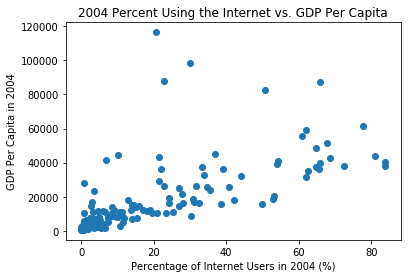

In [29]:
x_2004 = gdp_and_internet_use_2004['Internet_Users_Pct']
y_2004 = gdp_and_internet_use_2004['GDP_Per_Capita']
plt.scatter(x_2004,y_2004)
xlab = 'Percentage of Internet Users in 2004 (%)'
ylab = 'GDP Per Capita in 2004'
title = '2004 Percent Using the Internet vs. GDP Per Capita'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
plt.show()

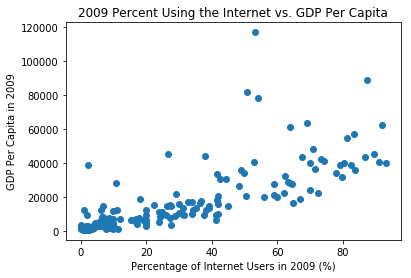

In [30]:
x_2009 = gdp_and_internet_use_2009['Internet_Users_Pct']
y_2009 = gdp_and_internet_use_2009['GDP_Per_Capita']
plt.scatter(x_2009,y_2009)
xlab1 = 'Percentage of Internet Users in 2009 (%)'
ylab1 = 'GDP Per Capita in 2009'
title1 = '2009 Percent Using the Internet vs. GDP Per Capita'
plt.xlabel(xlab1)
plt.ylabel(ylab1)
plt.title(title1)
plt.show()

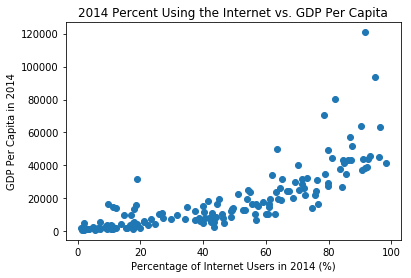

In [31]:
x_2014 = gdp_and_internet_use_2014['Internet_Users_Pct']
y_2014 = gdp_and_internet_use_2014['GDP_Per_Capita']
plt.scatter(x_2014,y_2014)
xlab2 = 'Percentage of Internet Users in 2014 (%)'
ylab2 = 'GDP Per Capita in 2014'
title2 = '2014 Percent Using the Internet vs. GDP Per Capita'
plt.xlabel(xlab2)
plt.ylabel(ylab2)
plt.title(title2)
plt.show()

In [32]:
# 2014 data appears to resemble a more exponential trend line. 
# Furthermore, from 2004 - 2014 data appears to improve in it's capability
# of being able to be more effectively mathematically modeled using an 
# exponential trend line.

In [33]:
gdp_and_internet_use_2014.loc[:,"GDP_Per_Capita"].mode()

0    3473.927554
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247BA5E2630>]],
      dtype=object)

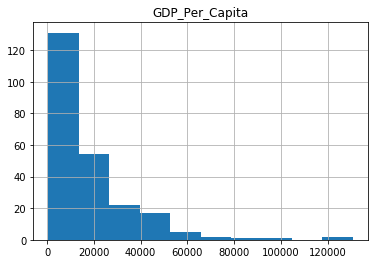

In [34]:
gdp_and_internet_use_2014.hist(column = 'GDP_Per_Capita')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000247BA69AB00>]],
      dtype=object)

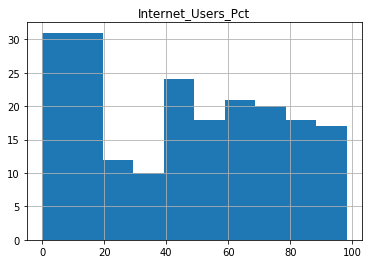

In [35]:
gdp_and_internet_use_2014.hist(column = 'Internet_Users_Pct')

In [36]:
gdp_and_internet_use_2014.loc[:,"Internet_Users_Pct"].mode()

0     2.1
1     9.0
2    11.0
3    43.0
4    43.4
5    61.0
dtype: float64

In [37]:
#It appears that the GDP data in 2014 is unimodal.  However, the percentage of Internet Users data is not unimodal.

In [38]:
gdp_and_internet_use_2014.loc[:,'Internet_Users_Pct'].max()

98.16

In [39]:
top_five_internet2014 = gdp_and_internet_use_2014.sort_values(by='Internet_Users_Pct', ascending=False)
top_five_internet2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
2332,Iceland,2014,41701.137092,98.16
6266,Bermuda,2014,NaN,96.80
4143,Norway,2014,63419.314779,96.30
1245,Denmark,2014,45057.074170,95.99
6209,Andorra,2014,NaN,95.90


In [40]:
countries=["Iceland", "Bermuda", "Norway", "Denmark", "Andorra"]
top_5_internet = gdp_and_internet_use_years[gdp_and_internet_use_years.Country.isin(countries)]

In [41]:
print(top_5_internet)

      Country  Year  GDP_Per_Capita  Internet_Users_Pct
478   Bermuda  2009    57151.919132           83.250000
483   Bermuda  2004    55452.638880           60.990867
1245  Denmark  2014    45057.074170           95.990000
1250  Denmark  2009    43382.625459           86.840000
1255  Denmark  2004    43670.445300           80.930000
2332  Iceland  2014    41701.137092           98.160000
2337  Iceland  2009    40189.632828           93.000000
2342  Iceland  2004    37865.375808           83.880000
4143   Norway  2014    63419.314779           96.300000
4148   Norway  2009    62698.285355           92.080000
4153   Norway  2004    61675.600782           77.690000
6209  Andorra  2014             NaN           95.900000
6214  Andorra  2009             NaN           78.530000
6219  Andorra  2004             NaN           26.837954
6266  Bermuda  2014             NaN           96.800000


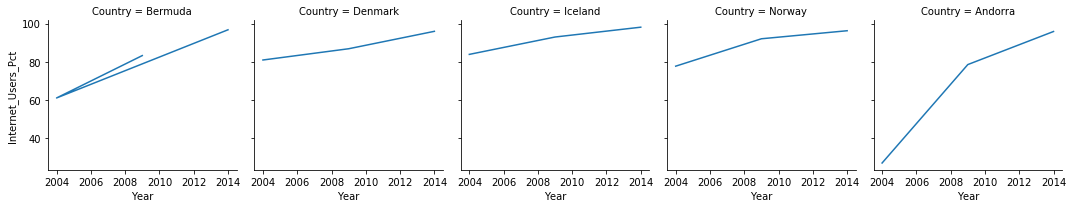

In [42]:
graph = sns.FacetGrid(top_5_internet, col="Country")
graph.map(plt.plot,'Year','Internet_Users_Pct')

In [43]:
bottom_five_internet2014 = gdp_and_internet_use_2014.sort_values(by='Internet_Users_Pct', ascending=True)
bottom_five_internet2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
6443,Dem. People's Rep. of Korea,2014,NaN,0.00
6482,Eritrea,2014,NaN,0.99
5576,Timor-Leste,2014,1887.666113,1.14
712,Burundi,2014,803.172837,1.38
7014,Somalia,2014,NaN,1.63


In [44]:
top_five_internet2014.tail()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
5755,Tuvalu,2014,3265.846974,NaN
5917,Upper middle income,2014,14845.351337,NaN
6050,Vietnam,2014,5264.828100,NaN
6077,West Bank and Gaza,2014,4319.769739,NaN
6100,World,2014,14454.302392,NaN


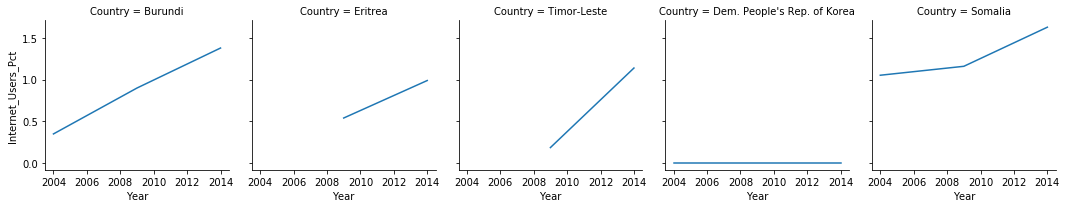

In [45]:
low_country = ["Dem. People's Rep. of Korea", "Eritrea", "Timor-Leste", "Burundi", "Somalia"]
bottom_5_internet = gdp_and_internet_use_years[gdp_and_internet_use_years.Country.isin(low_country)]
graph1 = sns.FacetGrid(bottom_5_internet, col="Country")
graph1.map(plt.plot,'Year','Internet_Users_Pct')

In [46]:
## The Dem. People's Republic of Korea has consistently had the least internet use from 2004 - 2014.

In [47]:
top_five_GDP2014 = gdp_and_internet_use_2014.sort_values(by='GDP_Per_Capita', ascending=False)
top_five_GDP2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
3319,"Macao SAR, China",2014,130755.115537,NaN
4590,Qatar,2014,120860.067558,91.49
3292,Luxembourg,2014,93655.334163,94.67
4882,Singapore,2014,80305.449884,82.00
631,Brunei,2014,76089.286574,NaN


In [48]:
countries_GDP_high=["Macao SAR, China", "Qatar", "Luxembourg", "Singapore", "Brunei"]
top_5_GDP = gdp_and_internet_use_years[gdp_and_internet_use_years.Country.isin(countries_GDP_high)]

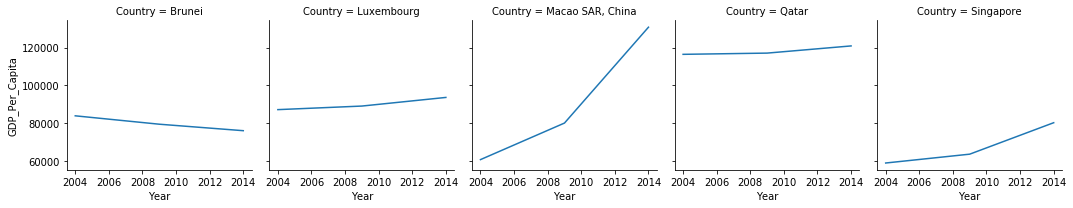

In [49]:
graph2 = sns.FacetGrid(top_5_GDP, col="Country")
graph2.map(plt.plot,'Year','GDP_Per_Capita')

In [50]:
bottom_five_GDP2014 = gdp_and_internet_use_2014.sort_values(by='GDP_Per_Capita', ascending=True)
bottom_five_GDP2014.head()

,Country,Year,GDP_Per_Capita,Internet_Users_Pct
899,Central African Republic,2014,601.785892,NaN
1218,Dem. Rep. Congo,2014,725.107860,NaN
712,Burundi,2014,803.172837,1.38
3149,Liberia,2014,804.719887,5.41
4062,Niger,2014,904.163981,1.95


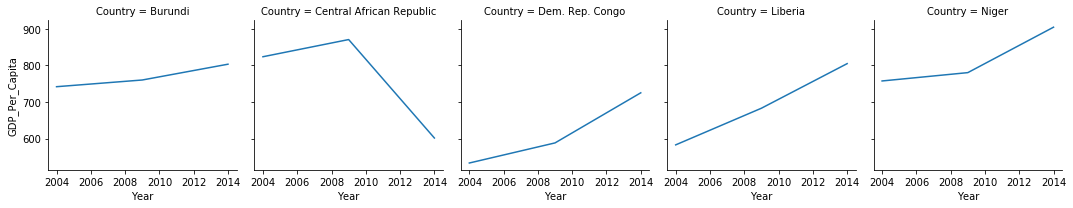

In [51]:
low_country_GDP = ["Central African Republic", "Dem. Rep. Congo", "Burundi", "Liberia", "Niger"]
bottom_5_GDP = gdp_and_internet_use_years[gdp_and_internet_use_years.Country.isin(low_country_GDP)]
graph3 = sns.FacetGrid(bottom_5_GDP, col="Country")
graph3.map(plt.plot,'Year','GDP_Per_Capita')

In [52]:
##Central African Repbulic experienced a sharp decrease in GDP from 2009 to 2014.  According to Wikipedia, this could be 
## indicative of war and a low human development index despite the natural resources available to the land.  This is very 
## unfortunate ":("

In [53]:
## Bonus Exercise

In [75]:
location = 'C:/Users/unews/nss_data_science/data-question-1-unewsome/data/Age-specific fertility rates, Total fertility and .xls'
fert_df = pd.read_excel(location, skiprows=4)
fert_df.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Year,Period,Unnamed: 5,15-19,20-24,25-29,30-34,...,45-49,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,Afghanistan,4,Around 1970,1973,1972-1973,8.21,168,359,355,307,...,81,30,Survey,National statistics,Afghanistan 1972-1974 National Demographic and...,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,4,..,1979,NaN,7.11,105,260,309,301,...,..,30.7,Census,National statistics,NaN,NaN,NaN,Adjusted estimate.,NaN,NaN


In [78]:
fert_df.columns
fert_df1 = fert_df[['Unnamed: 0', 'Year', 'Unnamed: 5', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44','45-49', 'Unnamed: 13']]
fert_df1.columns = ['Country', 'Year', 'Total Fertility', 'Age-specific fertility rates 15-19', 'Age-specific fertility rates 20-24', 'Age-specific fertility rates 25-29', 'Age-specific fertility rates 30-34', 'Age-specific fertility rates 35 - 39', 'Age-specific fertility rates 40-45', 'Age-specific fertility rates 45-49', 'Mean Age at Childbearing' ]
fert_df1.head(1)


,Country,Year,Total Fertility,Age-specific fertility rates 15-19,Age-specific fertility rates 20-24,Age-specific fertility rates 25-29,Age-specific fertility rates 30-34,Age-specific fertility rates 35 - 39,Age-specific fertility rates 40-45,Age-specific fertility rates 45-49,Mean Age at Childbearing
0,Afghanistan,1973,8.21,168,359,355,307,235,137,81,30


In [83]:
fert_gdp_and_internet_use=pd.merge(gdp_and_internet_use, fert_df1, on = ['Country', 'Year'], how = 'inner')

In [84]:

fert_gdp_and_internet_use.shape

(537, 13)

In [85]:
fert_gdp_and_internet_use.head(2)

,Country,Year,GDP_Per_Capita,Internet_Users_Pct,Total Fertility,Age-specific fertility rates 15-19,Age-specific fertility rates 20-24,Age-specific fertility rates 25-29,Age-specific fertility rates 30-34,Age-specific fertility rates 35 - 39,Age-specific fertility rates 40-45,Age-specific fertility rates 45-49,Mean Age at Childbearing
0,Afghanistan,2009,1531.173993,3.550000,5.11,80,257,262,209,128,60,26,29.1
1,Afghanistan,2003,1099.194507,0.087891,7.52,146,333,350,289,217,143,..,30.1


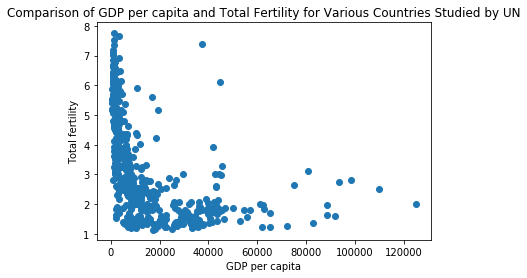

In [88]:
plt.scatter(fert_gdp_and_internet_use['GDP_Per_Capita'], fert_gdp_and_internet_use['Total Fertility'])
plt.xlabel("GDP per capita")
plt.ylabel("Total fertility")
plt.title("Comparison of GDP per capita and Total Fertility for Various Countries Studied by UN")
plt.show()

In [89]:
##  Will need to figure out how to adopt this code for my data...

#objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
#y_pos = np.arange(len(objects))
#performance = [10,8,6,4,2,1]
 
#plt.bar(y_pos, performance, align='center', alpha=0.5)
#plt.xticks(y_pos, objects)
#plt.ylabel('Usage')
#plt.title('Programming language usage')
 
#plt.show()

In [91]:
fert_gdp_and_internet_use.describe()
## Questioned why the fertility data did not show up

,Year,GDP_Per_Capita,Internet_Users_Pct
count,537.000000,471.000000,481.000000
mean,2001.791434,15427.508252,17.953326
std,6.198014,18636.603245,25.046433
min,1970.000000,373.435312,0.000000
25%,1996.000000,2722.161554,0.320309
50%,2004.000000,8147.362453,4.170000
75%,2006.000000,20281.044728,27.000000
max,2011.000000,125140.838348,93.390000


In [92]:
fert_df1.describe()
## Questioned why the fertility data did not show up

,Year
count,1073.000000
mean,1992.395154
std,13.407660
min,1960.000000
25%,1985.000000
50%,1995.000000
75%,2005.000000
max,2011.000000


In [97]:
type(fert_df1['Total Fertility'])

pandas.core.series.Series

In [98]:
type(gdp_and_internet_use['GDP_Per_Capita'])

pandas.core.series.Series

In [99]:
type(fert_df1.iloc[2,3])

int

In [100]:
fert_gdp_and_internet_use['Total Fertility'].describe()

count     537.00
unique    309.00
top         1.41
freq        6.00
Name: Total Fertility, dtype: float64

In [101]:
fert_gdp_and_internet_use['Mean Age at Childbearing'].describe()

count     537
unique     79
top        29
freq       17
Name: Mean Age at Childbearing, dtype: int64

In [108]:
x1 = np.random.normal(loc=5.0, size=400) * 100

y1 = np.random.normal(loc=10.0, size=400) * 10



x2 = np.random.normal(loc=5.0, size=800) * 50

y2 = np.random.normal(loc=5.0, size=800) * 10



x3 = np.random.normal(loc=55.0, size=200) * 10

y3 = np.random.normal(loc=4.0, size=200) * 10



x = np.concatenate((x1, x2, x3))

y = np.concatenate((y1, y2, y3))



TOOLS="pan,wheel_zoom,box_select,lasso_select,reset"



# create the scatter plot

p = figure(tools=TOOLS, plot_width=600, plot_height=600, min_border=10, min_border_left=50,

           toolbar_location="above", x_axis_location=None, y_axis_location=None,

           title="Linked Histograms")

p.background_fill_color = "#fafafa"

p.select(BoxSelectTool).select_every_mousemove = False

p.select(LassoSelectTool).select_every_mousemove = False



r = p.scatter(x, y, size=3, color="#3A5785", alpha=0.6)



# create the horizontal histogram

hhist, hedges = np.histogram(x, bins=20)

hzeros = np.zeros(len(hedges)-1)

hmax = max(hhist)*1.1



LINE_ARGS = dict(color="#3A5785", line_color=None)



ph = figure(toolbar_location=None, plot_width=p.plot_width, plot_height=200, x_range=p.x_range,

            y_range=(-hmax, hmax), min_border=10, min_border_left=50, y_axis_location="right")

ph.xgrid.grid_line_color = None

ph.yaxis.major_label_orientation = np.pi/4

ph.background_fill_color = "#fafafa"



ph.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hhist, color="white", line_color="#3A5785")

hh1 = ph.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.5, **LINE_ARGS)

hh2 = ph.quad(bottom=0, left=hedges[:-1], right=hedges[1:], top=hzeros, alpha=0.1, **LINE_ARGS)



# create the vertical histogram

vhist, vedges = np.histogram(y, bins=20)

vzeros = np.zeros(len(vedges)-1)

vmax = max(vhist)*1.1



pv = figure(toolbar_location=None, plot_width=200, plot_height=p.plot_height, x_range=(-vmax, vmax),

            y_range=p.y_range, min_border=10, y_axis_location="right")

pv.ygrid.grid_line_color = None

pv.xaxis.major_label_orientation = np.pi/4

pv.background_fill_color = "#fafafa"



pv.quad(left=0, bottom=vedges[:-1], top=vedges[1:], right=vhist, color="white", line_color="#3A5785")

vh1 = pv.quad(left=0, bottom=vedges[:-1], top=vedges[1:], right=vzeros, alpha=0.5, **LINE_ARGS)

vh2 = pv.quad(left=0, bottom=vedges[:-1], top=vedges[1:], right=vzeros, alpha=0.1, **LINE_ARGS)



layout = column(row(p, pv), row(ph, Spacer(width=200, height=200)))



curdoc().add_root(layout)

curdoc().title = "Selection Histogram"



def update(attr, old, new):

    inds = np.array(new['1d']['indices'])

    if len(inds) == 0 or len(inds) == len(x):

        hhist1, hhist2 = hzeros, hzeros

        vhist1, vhist2 = vzeros, vzeros

    else:

        neg_inds = np.ones_like(x, dtype=np.bool)

        neg_inds[inds] = False

        hhist1, _ = np.histogram(x[inds], bins=hedges)

        vhist1, _ = np.histogram(y[inds], bins=vedges)

        hhist2, _ = np.histogram(x[neg_inds], bins=hedges)

        vhist2, _ = np.histogram(y[neg_inds], bins=vedges)



    hh1.data_source.data["top"]   =  hhist1

    hh2.data_source.data["top"]   = -hhist2

    vh1.data_source.data["right"] =  vhist1

    vh2.data_source.data["right"] = -vhist2



r.data_source.on_change('selected', update)
